### Association Rule Mining

In [120]:
library(arules)
library(arulesViz)

data <- read.transactions("data.csv",
                           rm.duplicates = FALSE, 
                           format = "basket",  
                           sep=",",  ## csv file
                           cols=1)
data

transactions in sparse format with
 35 transactions (rows) and
 10 items (columns)

In [121]:
data <- data[1:20]

### Transaction Data

In [122]:
inspect(data)

     items                                      transactionID  
[1]  {HEADPHONES, WALLET}                       SMARTPHONE_CASE
[2]  {CHAIR, SCREEN_CLEANER}                    SMARTPHONE_CASE
[3]  {HDMI_CABLE, KEYBOARD, SCREEN GUARD}       SCREEN_CLEANER 
[4]  {HDMI_CABLE, HEADPHONES}                   CHARGER        
[5]  {HDMI_CABLE, SMARTPHONE_CASE}              SMARTPHONE     
[6]  {HDMI_CABLE, HEADPHONES, SMARTPHONE_CASE}  CHARGER        
[7]  {HDMI_CABLE, KEYBOARD, SCREEN GUARD}       SCREEN_CLEANER 
[8]  {CHAIR, WALLET}                            SMARTPHONE_CASE
[9]  {CHAIR, SCREEN_CLEANER}                    SMARTPHONE_CASE
[10] {HEADPHONES, WALLET}                       SMARTPHONE_CASE
[11] {SCREEN GUARD, SCREEN_CLEANER, SMARTPHONE} HEADPHONES     
[12] {CHAIR, WALLET}                            SCREEN_CLEANER 
[13] {HEADPHONES, SCREEN GUARD}                 CHARGER        
[14] {CHAIR, SCREEN GUARD}                      SCREEN_CLEANER 
[15] {CHAIR, HDMI_CABLE}                

### Association Rules 

In [123]:
rules <- apriori(data=data,parameter = list(supp=.04, conf=.06, minlen=2),
                    ,
                     control=list(verbose=FALSE))

inspect(rules)                                               

     lhs                               rhs               support confidence
[1]  {CHARGER}                      => {SMARTPHONE}      0.05    0.5000000 
[2]  {SMARTPHONE}                   => {CHARGER}         0.05    0.2500000 
[3]  {CHARGER}                      => {SMARTPHONE_CASE} 0.10    1.0000000 
[4]  {SMARTPHONE_CASE}              => {CHARGER}         0.10    0.5000000 
[5]  {CHARGER}                      => {HEADPHONES}      0.05    0.5000000 
[6]  {HEADPHONES}                   => {CHARGER}         0.05    0.1666667 
[7]  {WALLET}                       => {CHAIR}           0.10    0.5000000 
[8]  {CHAIR}                        => {WALLET}          0.10    0.3333333 
[9]  {WALLET}                       => {HEADPHONES}      0.10    0.5000000 
[10] {HEADPHONES}                   => {WALLET}          0.10    0.3333333 
[11] {KEYBOARD}                     => {SCREEN_CLEANER}  0.05    0.3333333 
[12] {SCREEN_CLEANER}               => {KEYBOARD}        0.05    0.2500000 
[13] {KEYBOA

### Rules - Smartphone in the LHS

In [124]:
rules <- apriori(data=data,parameter = list(supp=.04, conf=.06, minlen=2),
                     appearance = list(default="rhs", lhs="SMARTPHONE"),
                     control=list(verbose=FALSE))

inspect(rules)                                               

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[2] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[3] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 1    
[2] 1    
[3] 1    
[4] 2    
[5] 1    


### Association Rules sorted by Lift

Denotes the high association between the smartphone, this means that they are individually is less than compared to the purchase along with a smartphone.

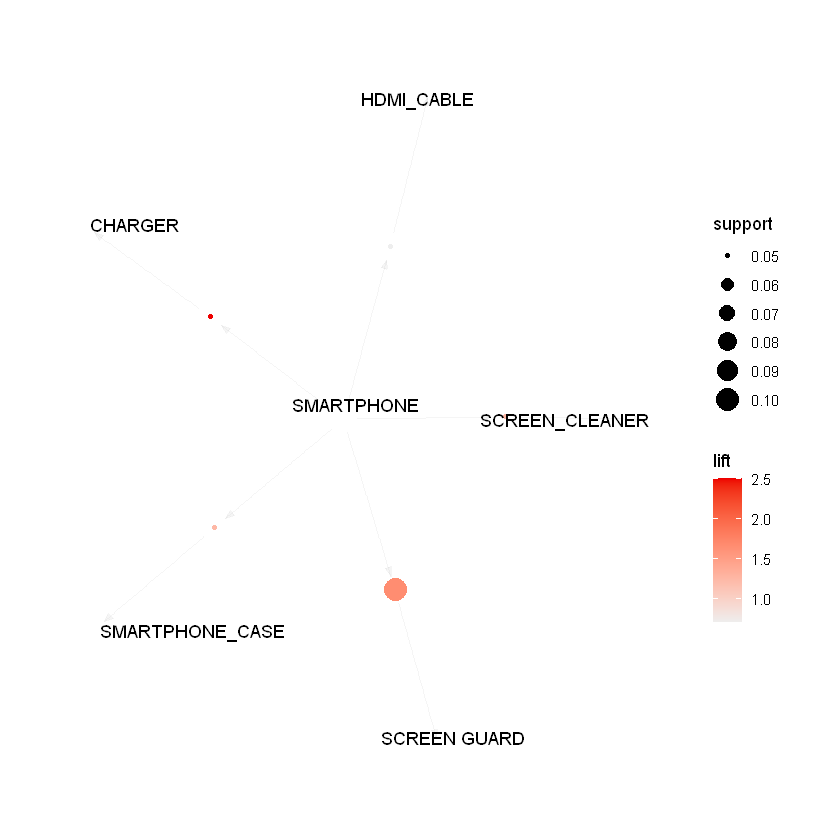

In [125]:
rules <- head(sort(rules, by="lift"))
plot(rules,method = "graph")  

### Association Rules sorted by Confidence

Denotes a strong correlation between the other products which can be used for recommendations, it is reliable indicator for their correlation strength.

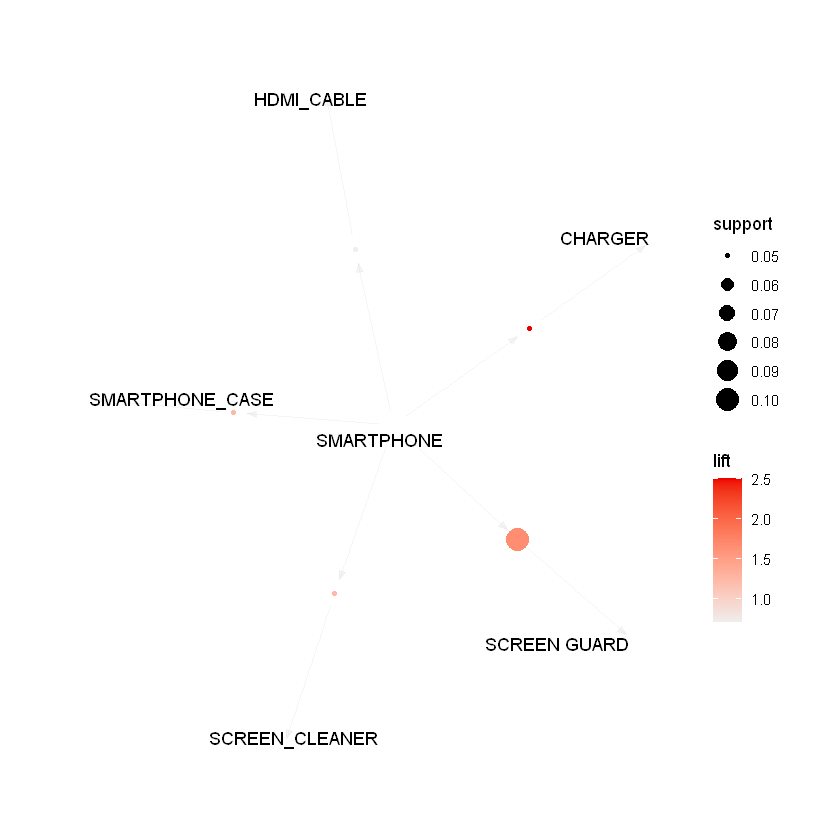

In [126]:
rules <- head(sort(rules, by="confidence"))
plot(rules,method = "graph")  

### Association Rules sorted by Support

Denotes the highly frequent item sets in the dataset which is just their repeated occurrence and popularity among the transactions.

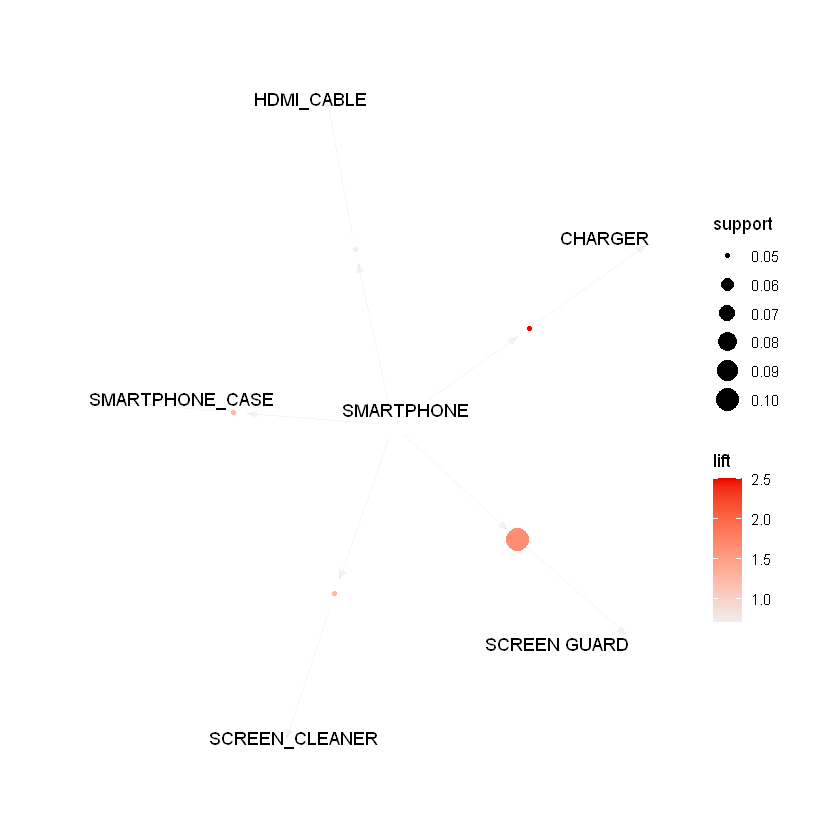

In [127]:
rules <- head(sort(rules, by="support"))
plot(rules,method = "graph")  

#### Top 5 Rules by Confidence

In [128]:
conf_rules <- sort(rules, decreasing=TRUE, by="confidence")
inspect(conf_rules[1:5])     

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[2] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[3] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 2    
[2] 1    
[3] 1    
[4] 1    
[5] 1    


#### Top 5 Rules by Lift

In [129]:
lift_rules <- sort(rules, decreasing=TRUE, by="lift")
inspect(lift_rules[1:5])     

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[2] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[3] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 1    
[2] 2    
[3] 1    
[4] 1    
[5] 1    


#### Top 5 Rules by Support

In [130]:
supp_rules <- sort(rules, decreasing=TRUE, by="support")
inspect(supp_rules[1:5])     

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[2] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[3] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 2    
[2] 1    
[3] 1    
[4] 1    
[5] 1    
